# **IA PARA CIENCIA DE DATOS**

## 1. Packaging

In [1]:
# Core libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np # to use numpy arrays instead of lists
import pandas as pd # DataFrame (table)

# Matplotlib and seaborn for charting
import matplotlib.pyplot as plt # to plot
import seaborn as sns # to plot

np.random.seed(0)

In [2]:
# Sklearn processing modules
from sklearn import preprocessing # to normalize data
from sklearn.model_selection import train_test_split
import sklearn.decomposition as sk # to compute PCA

In [3]:
# Sklearn clustering algorithms
from sklearn.cluster import KMeans

In [4]:
# Load built-in sample data set
from sklearn.datasets import load_iris

## 2. Working on Data

### 2.1 Data Gathering

In [ ]:
# we load the iris dataset
# the dataset load as an array 
iris_data = load_iris()
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df["Iris_type"]=iris_data.target
print(iris_df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     Iris_type  
0         

### 2.2 Correlation analysis

                 CORRELATION ANALYSIS
----------------------------------------------------------
                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   
Iris_type                   0.782561         -0.426658           0.949035   

                   petal width (cm)  Iris_type  
sepal length (cm)          0.817941   0.782561  
sepal width (cm)          -0.366126  -0.426658  
petal length (cm)          0.962865   0.949035  
petal width (cm)           1.000000   0.956547  
Iris_type                  0.956547   1.000000  




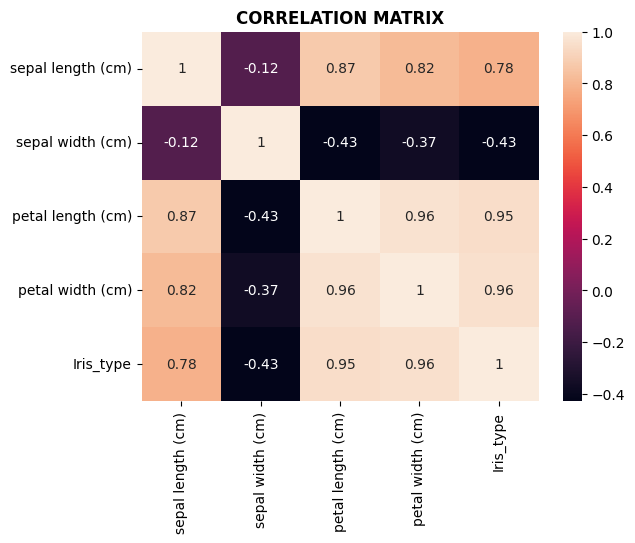

<Figure size 640x480 with 0 Axes>

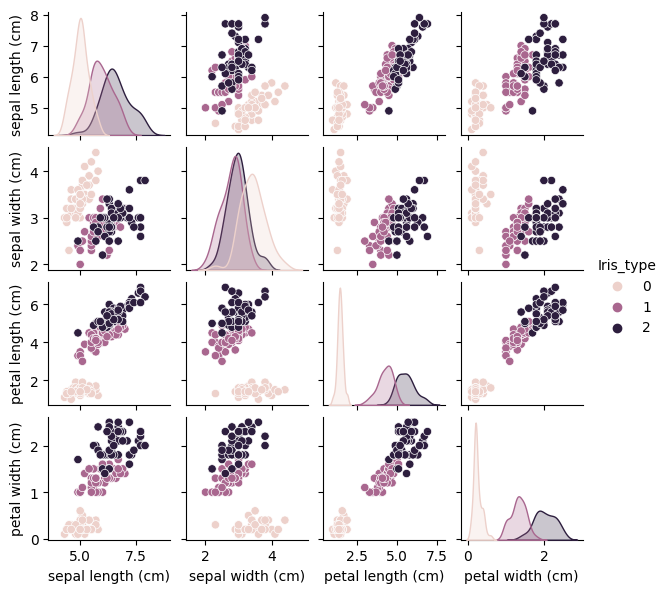

In [18]:
# correlation analysis
correlation=iris_df.corr(method = 'pearson')
print("==========================================================")
print("                 CORRELATION ANALYSIS")
print("----------------------------------------------------------")
print(correlation)
print("\n")

plt.figure()
sns.heatmap(correlation, annot=True)
plt.title('CORRELATION MATRIX', fontweight='bold')
plt.show()
print()

plt.figure()
sns.pairplot(iris_df, hue="Iris_type", height=1.5)
plt.show()

## 3. Cluster Analysis

### 3.1 PCA

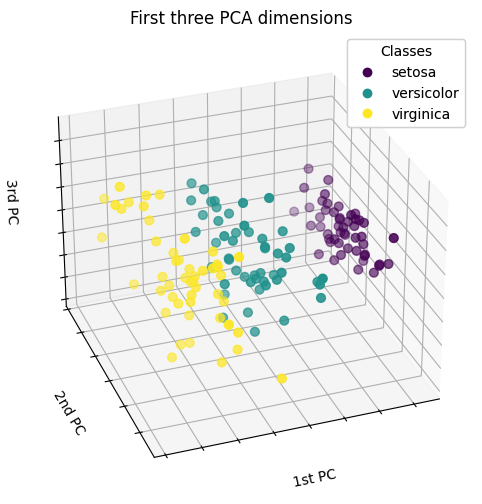

In [28]:
pca = sk.PCA(n_components=3).fit_transform(iris_data.data)

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    pca[:, 0],
    pca[:, 1],
    pca[:, 2],
    c=iris_data.target,
    s=40,
)

ax.set(
    title="First three PCA dimensions",
    xlabel="1st PC",
    ylabel="2nd PC",
    zlabel="3rd PC",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris_data.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

### 3.2 K-Means

In [22]:
ts_size = .3
trainSet, testSet = train_test_split(iris_df, test_size=ts_size, shuffle=True, random_state=0)
print("Train set")
print(trainSet.head())
print()
print('trainSet shape: ', trainSet.shape)
print()

print("Test set")
print(testSet.head())
print()
print('testSet shape: ', testSet.shape)
print()

Train set
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
60                 5.0               2.0                3.5               1.0   
116                6.5               3.0                5.5               1.8   
144                6.7               3.3                5.7               2.5   
119                6.0               2.2                5.0               1.5   
108                6.7               2.5                5.8               1.8   

     Iris_type  
60           1  
116          2  
144          2  
119          2  
108          2  

trainSet shape:  (105, 5)

Test set
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
114                5.8               2.8                5.1               2.4   
62                 6.0               2.2                4.0               1.0   
33                 5.5               4.2                1.4               0.2   
107                7.3               2.9

In [34]:
xVar = iris_data.feature_names
yVar = "Iris_type"
print(xVar)
print()
print(yVar)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Iris_type


In [35]:
KMestimator = KMeans(n_clusters=3, random_state=0)
KMestimator.fit(trainSet[xVar])
trainSet['Cluster']=KMestimator.labels_
print(trainSet)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
60                 5.0               2.0                3.5               1.0   
116                6.5               3.0                5.5               1.8   
144                6.7               3.3                5.7               2.5   
119                6.0               2.2                5.0               1.5   
108                6.7               2.5                5.8               1.8   
..                 ...               ...                ...               ...   
9                  4.9               3.1                1.5               0.1   
103                6.3               2.9                5.6               1.8   
67                 5.8               2.7                4.1               1.0   
117                7.7               3.8                6.7               2.2   
47                 4.6               3.2                1.4               0.2   

     Iris_type  Cluster  
6

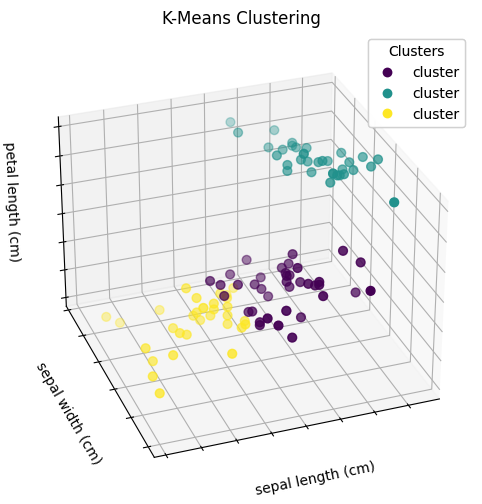

In [47]:
column_names = trainSet.columns
clusters = ['cluster', 'cluster', 'cluster']

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

scatter = ax.scatter(
    trainSet.iloc[:, 0],
    trainSet.iloc[:, 1],
    trainSet.iloc[:, 2],
    c=trainSet.loc[:,'Cluster'],
    s=40,
)

ax.set(
    title="K-Means Clustering",
    xlabel=column_names[0],
    ylabel=column_names[1],
    zlabel=column_names[2],
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    clusters,
    loc="upper right",
    title="Clusters",
)
ax.add_artist(legend1)

plt.show()